<table style="width:100%">
  <tr>
    <td><center style="font-size:500%;">Representação Distribuida de Palavras (Parte 2)</center></td>
    <td><img src="https://logodownload.org/wp-content/uploads/2015/02/puc-rio-logo.gif" width="100"/></td> 
  </tr>    
</table>


##vamos criar nosso petrolês no proximo link teremos accesso aproximadamente 400 teses e tcc de petroleo

In [1]:
%%bash

wget https://github.com/fabiocorreacordeiro/wordEmbeddingsOG/raw/master/_corpus/PRH.zip
unzip PRH.zip

Archive:  PRH.zip
  inflating: PRH/20120904-MONOGRAFIA_0.txt  
  inflating: PRH/20121011-MONOGRAFIA_0 (1).txt  
  inflating: PRH/20121011-MONOGRAFIA_0 (2).txt  
  inflating: PRH/20121011-MONOGRAFIA_0.txt  
  inflating: PRH/20121011-TESEMSC_0 (1).txt  
  inflating: PRH/20121011-TESEMSC_0 (2).txt  
  inflating: PRH/20121011-TESEMSC_0.txt  
  inflating: PRH/20121015-TESEMSC_0.txt  
  inflating: PRH/20121105-MONOGRAFIA_0.txt  
  inflating: PRH/20121105-TESEMSC_0 (1).txt  
  inflating: PRH/20121105-TESEMSC_0.txt  
  inflating: PRH/20121107-TESEMSC_0.txt  
  inflating: PRH/20121113-TESEMSC_0.txt  
  inflating: PRH/20121119-TESEMSC_0.txt  
  inflating: PRH/20121130-MONOGRAFIA_0.txt  
  inflating: PRH/20121206-TESEDSC_1.txt  
  inflating: PRH/20121217-MONOGRAFIA_0.txt  
  inflating: PRH/20121220-MONOGRAFIA_0.txt  
  inflating: PRH/20130226-TESEMSC_0.txt  
  inflating: PRH/20130317-TESEDSC_0.txt  
  inflating: PRH/20130320-TESEMSC_0.txt  
  inflating: PRH/20130513-TESEMSC_0.txt  
  inflating: P

--2022-01-19 12:29:38--  https://github.com/fabiocorreacordeiro/wordEmbeddingsOG/raw/master/_corpus/PRH.zip
Resolvendo github.com (github.com)... 20.201.28.151
Conectando-se a github.com (github.com)|20.201.28.151|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://raw.githubusercontent.com/fabiocorreacordeiro/wordEmbeddingsOG/master/_corpus/PRH.zip [redirecionando]
--2022-01-19 12:29:39--  https://raw.githubusercontent.com/fabiocorreacordeiro/wordEmbeddingsOG/master/_corpus/PRH.zip
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 14893401 (14M) [application/zip]
Salvando em: “PRH.zip”

     0K .......... .......... .......... .......... ..........  0%  722K 20s
    50K .......... .........

##carregamos nossas bibliotecas

In [54]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import csv
import gensim
from itertools import groupby
from gensim.similarities import WmdSimilarity
from gensim.models import Word2Vec

nltk.download('punkt') 
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/LeonardoLins/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LeonardoLins/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Vamos criar uma função que leia todos os arquivos
## Depois aplicamos um encoding 

In [55]:
def read_files(filenames):
  lines = []
  # Lendo todos os documentos de texto
  for index,filename in enumerate(filenames):

      file = open(filename, 'r', encoding='utf-8')

      for line in file:

          # Remover espaços em branco 
          line = line.strip()

          # Pula linhas em branco
          if len(line) == 0:
              continue

          lines.append(line)

      if index % 10 == 0:
          print(".",end=" ")
  
  print("LEITURA COMPLETA!")
  
  text = " ".join(lines)
  
  return text

##criamos uma pasta com nossos arquivos

In [56]:
filenames =  glob.glob("PRH/*") #lista diretório de forma global

text = read_files(filenames)
text = nltk.word_tokenize(text , language='portuguese')
print("Tokenizando Completada!")

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . LEITURA COMPLETA!
Tokenizando Completada!


## Agrupamos o texto que se encontra entre ponto e ponto

In [58]:
# Agrupamos por texto que se encontra entre 2 ponto.
sentences = [list(group) for k, group in groupby(text, lambda x: x == ".") if not k] #k será falso ou verdadeiro.
# sentence é uma lista de lista.

# Remove stopwords numbers and punctuation.

def preprocess(sentence):
  return [word for word in sentence if word not in stop_words and word.isalpha()]

sentences = [preprocess(sentence) for sentence in sentences] #

# Seleccionamos frases com dimensão entre 3 e 150 palavras.
sentences =  [sentence for sentence in sentences if len(sentence)>3 and len(sentence)<150]

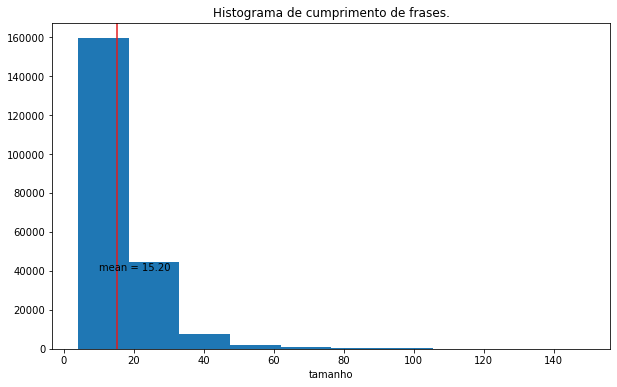

In [59]:
lens = [len(sentence) for sentence in sentences]
avg_len = sum(lens) / float(len(lens))

plt.figure(figsize=(10,6))
plt.hist([len(sentence) for sentence in sentences])
plt.axvline(avg_len, color='#e41a1c')
plt.title('Histograma de cumprimento de frases.')
plt.xlabel('tamanho')
plt.text(10, 40000, 'mean = %.2f' % avg_len)
plt.show()

## agora é com voces que estou passando ao codigo???


##Wmdsimilarity vimos esse conceito em aula


In [60]:
# Treinamos Word2Vec com todos as frases
model = Word2Vec(sentences, workers=2, size=50)

# Calculamos a similaridade entre um conjunto de frases
num_best = 10
instance = WmdSimilarity(sentences[:1000], model, num_best=10)

##vamos a perguntar a similaridade com as sentençãs

In [61]:
text = 'muito obrigado'
sentence = nltk.word_tokenize(text.lower(), language='portuguese')
query = preprocess(sentence)
sims = instance[query]  # A query observa na classe de similaridade.

##mostramos os resultados das consultas

In [62]:
# Mostramos os resultado à da frase perguntada na celula anterior 
print('Query:')
print(text)
for i in range(num_best):
    print("")
    print('sim = %.4f' % sims[i][1])
    print(" ".join(sentences[sims[i][0]]))

Query:
muito obrigado

sim = 0.6420
Ao esposo Anderson amor companheirismo dedicação paciência compreensão

sim = 0.6175
Aos pais avó incentivo tudo fizeram fazem mim hoje

sim = 0.6003
Título DEDICATÓRIA Ao esposo especial filho

sim = 0.5646
Amo AGRADECIMENTOS A orientadora Profª Drª Suani Teixeira Coelho confiança aprendizado oportunidade

sim = 0.5501
FICHA CATALOGRÁFICA Garcilasso Vanessa Pecora

sim = 0.5393
Sob coordenação Profª Drª Suani Coelho parceiros

sim = 0.5371
À equipe CENBIO especial Cristiane Lima Cortez Naraisa Esteves Coluna equipe projeto especial Renata Grisoli contribuíram trabalho

sim = 0.5180
Ao filho Nathan presente Deus alegra dá forças incentiva inspira renova orgulha Obrigada filho existir vida Ao CNPq Programa Recursos Humanos ANP Setor Petróleo Gás n

sim = 0.5096
Dissertação Mestrado Faculdade Engenharia Química Universidade Estadual Campinas Campinas

sim = 0.5046
UNIVERSIDADE FEDERAL DE SÃO CARLOS CENTRO DE CIÊNCIAS EXATAS E TECNOLOGIA DEPARTAMENTO DE

##agora similaridade por token

In [63]:
model.wv.most_similar('petróleo')

[('petrolífera', 0.7467620372772217),
 ('maduros', 0.6785228252410889),
 ('natural', 0.6756860613822937),
 ('óleo', 0.6672649383544922),
 ('hidratos', 0.6578920483589172),
 ('petroquímica', 0.6551876664161682),
 ('exploração', 0.6506679058074951),
 ('petrolíferos', 0.6381402611732483),
 ('têxtil', 0.6358485221862793),
 ('proteção', 0.6288328766822815)]

## criamos os vectores para mostrar em pca e t-sne

##são dois vetores padrão w2v e metadados

In [64]:
tensor_file = 'word_tensor.w2v'
model.wv.save_word2vec_format(tensor_file)
key_vectors = gensim.models.KeyedVectors.load_word2vec_format(tensor_file, binary=False)

In [65]:
words_id = []
vectors = []
for word_id in key_vectors.index2word[:10000]:
    words_id.append(word_id)
    vectors.append(key_vectors[word_id])

## codigo padrão tensor flow cria os vetores 

In [66]:
def create_tensorboard_files(tensor_filename, vectors, metadatos, colnames=None):

    out_file_tsv      = tensor_filename + '_tensor.tsv'
    out_file_tsv_meta = tensor_filename + '_metadata.tsv'
    
    with open(out_file_tsv, 'w',encoding='utf-8') as f:   
        for vector in vectors:
            vector_str = "\t".join([str(x) for x in vector])
            f.write( vector_str + '\n')

    with open(out_file_tsv_meta, 'w',encoding='utf-8') as f:
        writer = csv.writer(f, delimiter='\t')
        if len(metadatos)>=2:
            if colnames is None:
                colnames = "\t".join([str(i) for i in range(len(metadatos))])
            writer.writerow(colnames)
            for metadato in zip(*metadatos):
                line = [str(x) for x in metadato]
                writer.writerow(line)
        else:
            for metadato in metadatos[0]:
                writer.writerow([metadato])
            
    print("Arquivo com o Tensor 2D foi salvado em: %s" % out_file_tsv)
    print("Arquivo com o Tensor de metadatos foi salvado em: %s" % out_file_tsv_meta)

Guarda no desktop

In [67]:
metadatos=[words_id]
create_tensorboard_files(tensor_filename="word", 
                      vectors=vectors, 
                      metadatos=[words_id])

Arquivo com o Tensor 2D foi salvado em: word_tensor.tsv
Arquivo com o Tensor de metadatos foi salvado em: word_metadata.tsv


##guarda no colab

In [17]:
#from google.colab import drive

#drive.mount('/content/drive')

Baixa os arquivos gerados e colocar em Tensoboard:


In [18]:
#from google.colab import files
#files.download('word_tensor.tsv')
#files.download('word_metadata.tsv')

In [19]:
import tensorflow as tf
import datetime


In [20]:
!ls

PRH               artigos.ipynb     word_tensor.tsv
PRH.zip           word_metadata.tsv word_tensor.w2v
